### Import the needed package

In [ ]:
import sys
sys.path.insert(0, './../')

import os
import utilities as utils

### Global variable

In [3]:
path_dataset_ori = "./../../../dataset_used_split_ori"
path_dataset_aug = "./../../../dataset_used_split_aug"
path_test_ori = os.path.join(path_dataset_ori, "test")
path_test_aug = os.path.join(path_dataset_aug, "test")
test_ori_img, test_ori_mask = utils.load_img_mask(path_test_ori)
test_aug_img, test_aug_mask = utils.load_img_mask(path_test_aug)
testset_ori = utils.create_dataset(test_ori_img, test_ori_mask)
testset_aug = utils.create_dataset(test_aug_img, test_aug_mask)

### Test the model

In [4]:
predicted_mask_ori, model_ori = utils.predict_model(testset_ori, "unet_model_ori")
predicted_mask_aug, model_aug = utils.predict_model(testset_aug, "unet_model_aug")

1/1 [==============================] - 0s 413ms/step


In [14]:
import matplotlib.pyplot as plt
import numpy as np

(array([254815.,   6969.,   4655.,      0.,   1092.,   1109.,   1177.,
          2213.,   4893.,  69383.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

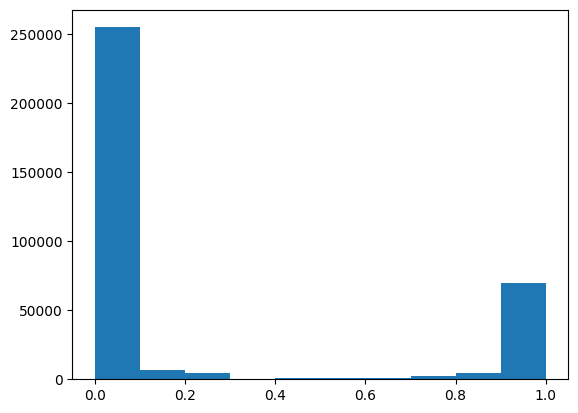

In [17]:
plt.hist(np.unique(predicted_mask_aug))

### Split the disc and cup mask

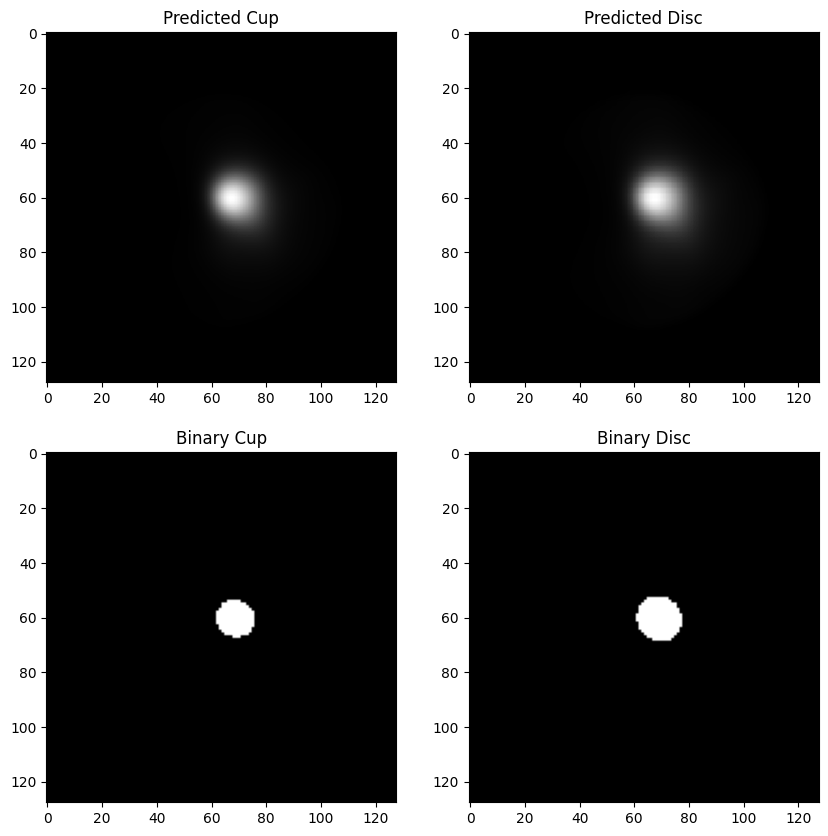

In [5]:
cup_mask_ori, disc_mask_ori, bcup_mask_ori, bdisc_mask_ori = utils.split_disc_cup_mask(predicted_mask_ori)

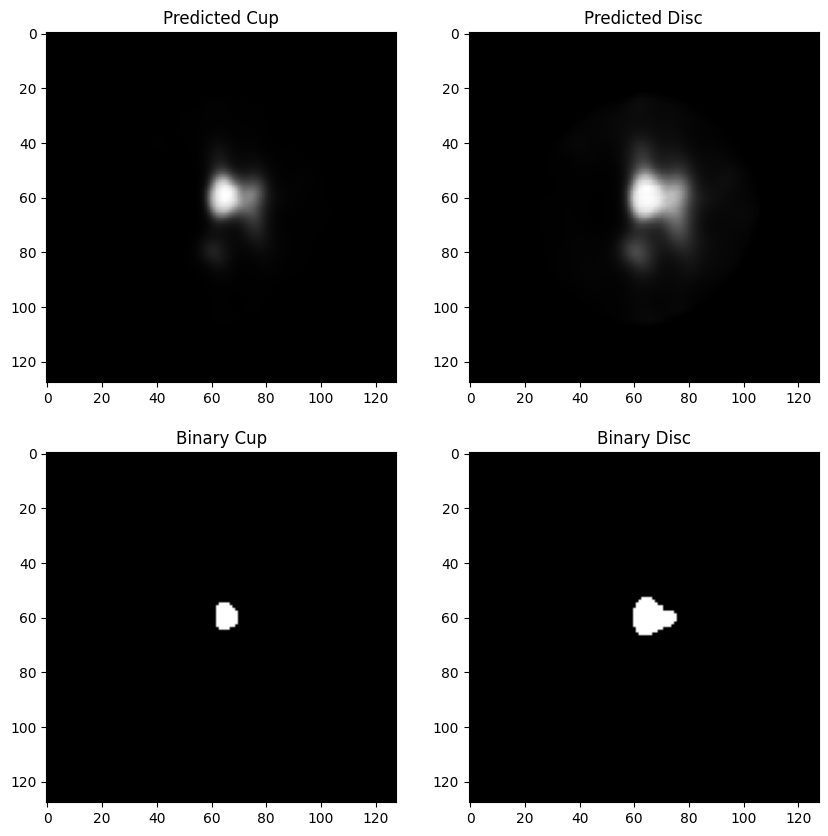

In [24]:
cup_mask_aug, disc_mask_aug, bcup_mask_aug, bdisc_mask_aug = utils.split_disc_cup_mask(predicted_mask_aug, 0.2)

### Visualize the test and predicted image

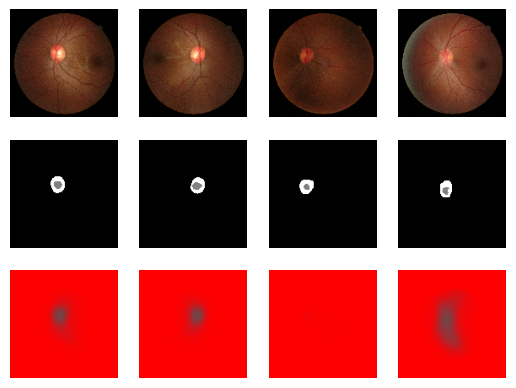

In [8]:
utils.visualize_pred_mask(testset_ori, model_ori, 4)

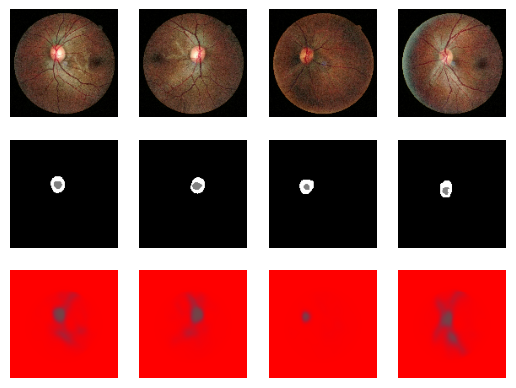

In [25]:
utils.visualize_pred_mask(testset_aug, model_aug, 4)

### Calculate the CDR value

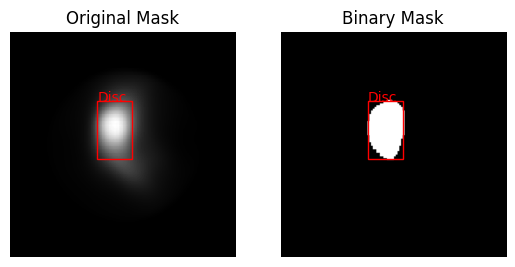

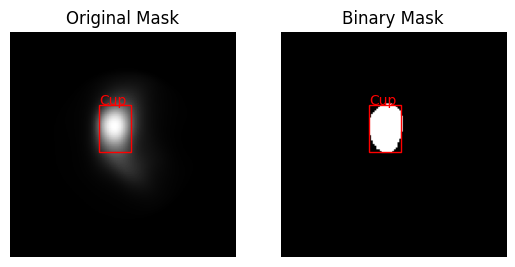

[{'cup_area': 420, 'disc_area': 547, 'acdr': 0.7678244972577697, 'h_cdr': 0.9047619047619048, 'v_cdr': 0.8235294117647058}, {'d_ymin': 39, 'd_ymax': 72, 'd_xmin': 49, 'd_xmax': 69, 'd_height': 34, 'd_width': 21, 'c_ymin': 41, 'c_ymax': 68, 'c_xmin': 50, 'c_xmax': 68, 'c_height': 28, 'c_width': 19}]


In [10]:
print(utils.calculate_area_CDR(cup_mask_ori[0], disc_mask_ori[0], bcup_mask_ori[0], bdisc_mask_ori[0]))

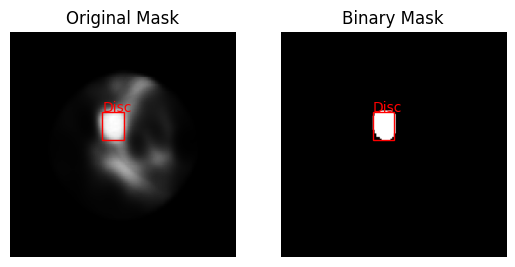

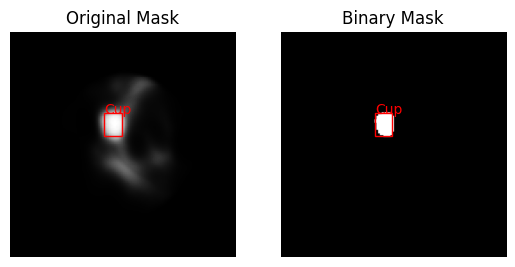

[{'cup_area': 123, 'disc_area': 190, 'acdr': 0.6473684210526316, 'h_cdr': 0.8461538461538461, 'v_cdr': 0.8235294117647058}, {'d_ymin': 45, 'd_ymax': 61, 'd_xmin': 52, 'd_xmax': 64, 'd_height': 17, 'd_width': 13, 'c_ymin': 46, 'c_ymax': 59, 'c_xmin': 53, 'c_xmax': 63, 'c_height': 14, 'c_width': 11}]


In [26]:
print(utils.calculate_area_CDR(cup_mask_aug[0], disc_mask_aug[0], bcup_mask_aug[0], bdisc_mask_aug[0]))